### Basic Analysis on FoodBalanceSheets_E_Africa_NOFLAG data

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [63]:
food_data = pd.read_csv('FoodBalanceSheets_E_Africa_NOFLAG.csv', encoding = 'latin-1')

In [64]:
food_data.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [65]:
food_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area Code,60943.0,134.265576,72.605709,4.0,74.0,136.00,195.00,276.0
Item Code,60943.0,2687.176706,146.055739,2501.0,2562.0,2630.00,2775.00,2961.0
Element Code,60943.0,3814.856456,2212.007033,511.0,684.0,5142.00,5511.00,5911.0
Y2014,59354.0,134.196282,1567.663696,-1796.0,0.0,0.09,8.34,176405.0
Y2015,59395.0,135.235966,1603.403984,-3161.0,0.0,0.08,8.46,181137.0
Y2016,59408.0,136.555222,1640.007194,-3225.0,0.0,0.08,8.43,185960.0
Y2017,59437.0,140.917765,1671.862359,-1582.0,0.0,0.10,9.00,190873.0
Y2018,59507.0,143.758381,1710.782658,-3396.0,0.0,0.07,9.00,195875.0


In [66]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 4.6+ MB


In [67]:
food_data.groupby('Item').sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Item,,,,,,,,
"Alcohol, Non-Food",38447,752497,1515090,2403.00,2180.00,2223.00,2348.00,2293.00
Alcoholic Beverages,75016,1649136,2171381,102410.11,98783.72,96958.75,95581.06,97847.27
Animal Products,18060,397035,90990,11935.65,11811.73,11661.69,11547.65,11578.61
Animal fats,85279,1882494,2567303,209460.54,200675.72,183314.22,269617.53,269648.27
Apples and products,69280,1352989,1920418,9499.23,10559.15,9853.26,10198.90,9640.51
...,...,...,...,...,...,...,...,...
"Vegetables, Other",77779,1518715,2275409,155038.96,158104.08,156218.90,157752.59,163987.21
Vegetal Products,18060,391905,90990,107145.19,107064.17,106792.72,107655.20,107775.39
Wheat and products,87073,1639683,2654934,232670.13,234710.51,239377.07,240047.62,242645.19


1. The total sum of Animal fat produced in 2014 is 209460.54
2. TThe total sum of Animal fat produced in 2017 is 269617.53

In [68]:
m_ean = food_data['Y2015'].mean()
s_td = food_data['Y2015'].std()

print("The mean across the whole dataset for the year 2015 is: {} (3 decimal places)".format(round((m_ean), 3)))
print("The standard deviation across the whole dataset for the year 2015 is: {} (3 decimal places)".format(round((s_td), 3)))

The mean across the whole dataset for the year 2015 is: 135.236 (3 decimal places)
The standard deviation across the whole dataset for the year 2015 is: 1603.404 (3 decimal places)


In [69]:
total_no = food_data['Y2016'].isnull().sum()
per_total_no = food_data['Y2016'].isnull().sum() *  100 / len(food_data)

print("The total number of missing data in 2016 is {}".format((total_no), 2))
print("The total percentage of missing data in 2016 is {} (2 decimal places)".format(round((per_total_no), 2)))

The total number of missing data in 2016 is 1535
The total percentage of missing data in 2016 is 2.52 (2 decimal places)


<AxesSubplot:>

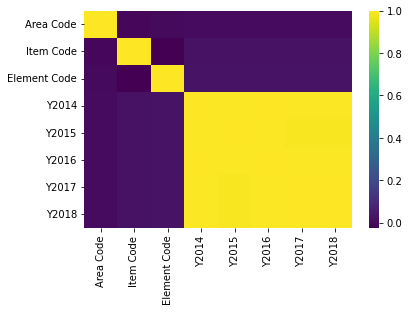

In [70]:
sns.heatmap(data = food_data.corr(), cmap = 'viridis')

All the years have the same correlation with 'Element code'

In [71]:
food_data.groupby('Element').sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,,,,
Domestic supply quantity,708993,14197445,28068795,1996716.35,2021493.55,2044842.70,2088198.10,2161192.10
Export Quantity,599910,11840553,26026133,150020.64,157614.47,151920.46,182338.80,181594.80
Fat supply quantity (g/capita/day),675050,13535000,3435732,10225.56,10235.74,10102.77,10253.84,10258.69
Feed,176272,3538507,7282199,216927.89,225050.22,228958.65,223705.68,233489.68
Food,663295,13285035,25406622,1212332.49,1232361.10,1247022.17,1258888.28,1303841.28
Food supply (kcal/capita/day),674057,13511060,3329296,454257.00,453383.00,451810.00,454681.00,455261.00
Food supply quantity (kg/capita/yr),658446,13185401,3163725,49650.63,49345.13,48985.28,48690.04,49056.85
Import Quantity,688174,13795966,28834929,274144.48,267018.46,286582.78,294559.09,287997.09
Losses,274353,5424803,10292107,153223.00,155439.00,157787.00,160614.00,163902.00


1. The year with the highest sum of Import Quantity is 2017
2. The total sum of Production in 2014 is 1931287.75

In [72]:
food_data.loc[:, ['Y2018', 'Element']].groupby('Element').sum()

,Y2018
Element,
Domestic supply quantity,2161192.10
Export Quantity,181594.80
Fat supply quantity (g/capita/day),10258.69
Feed,233489.68
Food,1303841.28
Food supply (kcal/capita/day),455261.00
Food supply quantity (kg/capita/yr),49056.85
Import Quantity,287997.09
Losses,163902.00


1. The element with the highest sum in 2018 is Domestic supply quantity
2. Th element with the 3rd lowest sum in 2018 is Seed

In [73]:
len(food_data['Area'].unique())

49

The total number of unique countries in the dataset is 49